In [1]:
import numpy as np 

# Basic Feed Forward Neural Network - from scratch 

In [2]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# np.dot = dot-product yani matris çarpımı .
# bir sinir ağının hesaplanması  

weights = np.random.randn(3,2) # Agırlıklar 
inputs = np.random.randn(2,2) # Hidden stateler(ya da normal sinir agindaki girdiler) 
biases = np.random.randn(3,1) # bias degerleri 
print("Weights\n",weights)
print("Shape:",weights.shape)
print("\nInputs\n",inputs)
print("Shape:",inputs.shape)
print("Biases\n",biases)
Z = np.dot(weights,inputs)  + biases
print("\nWeights x Inputs + Bias = Z = Lineer Sonuçlar>\n",Z) 
print("Shape:",Z.shape)

sigma = np.tanh(Z) # aktivasyon fonksiyonu 
print("\n Tanh ile işlenmiş Non-lineer sonuçlar\n",sigma)

softmaxscores = softmax(sigma) # softmax agırlıkları 
print("\n Softmax skorları \n",softmaxscores)

Weights
 [[ 1.6217965  -0.32740423]
 [-0.75210648  1.82609536]
 [-0.48026473 -0.26557421]]
Shape: (3, 2)

Inputs
 [[ 0.35017161 -0.17347363]
 [-1.55740032  0.42355124]]
Shape: (2, 2)
Biases
 [[-0.15199703]
 [-0.46125323]
 [-0.62590809]]

Weights x Inputs + Bias = Z = Lineer Sonuçlar>
 [[ 0.92580952 -0.57200843]
 [-3.56858107  0.44266236]
 [-0.38047781 -0.6550791 ]]
Shape: (3, 2)

 Tanh ile işlenmiş Non-lineer sonuçlar
 [[ 0.72863417 -0.51683275]
 [-0.99841125  0.41584884]
 [-0.36312234 -0.57507926]]

 Softmax skorları 
 [[0.66074837 0.22297876]
 [0.117487   0.56665921]
 [0.22176463 0.21036203]]


# Basic RNN from scratch 

### A RNN Cell

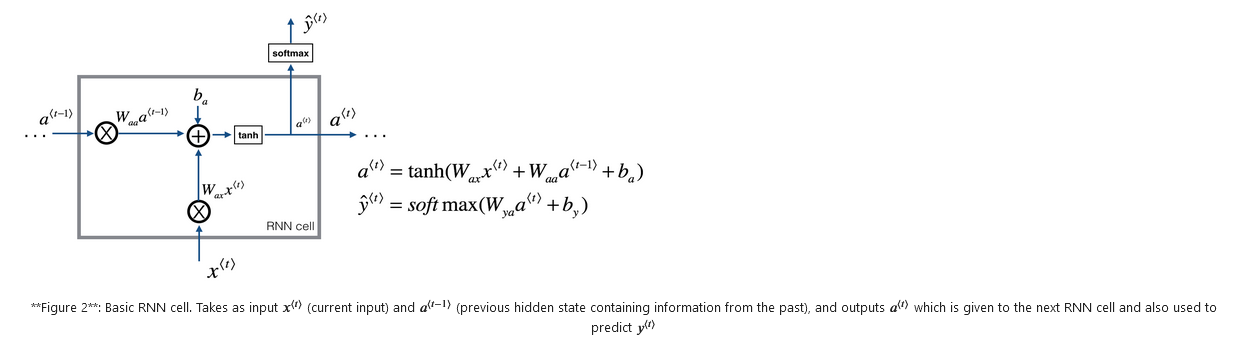

In [3]:
np.random.seed(1)
xt = np.random.randn(3,10) # inputlar
a_prev = np.random.randn(5,10) # baslangic durumu
Waa = np.random.randn(5,5) # Mevcut sekans için hidden state, agirlikları
Wax = np.random.randn(5,3) # Input agırlıkları
Wya = np.random.randn(2,5) # Tahmin agırlıkları 
ba = np.random.randn(5,1) # Mevcut durum sonraki hidden state'i hesaplayan bias
by = np.random.randn(2,1) # Mevcut durum Tahmin ederken kullanılan bias 
parameters = {"waa": Waa, "wax": Wax, "wya": Wya, "ba": ba, "by": by}

print("Inputlar\n",xt,"\nShape:",xt.shape)
print("\nİlk input:\n",xt[0],"\nShape:",xt[0].shape)
for k,v in parameters.items():
    print(k,"\n",v,"\n","Shape:",v.shape)
    
assert np.dot(Waa,a_prev).shape == (5,10)
assert np.dot(Wax,xt).shape == (5,10)


Inputlar
 [[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176 -0.7612069   0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944 -1.09989127
  -0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595 -0.68372786
  -0.12289023 -0.93576943 -0.26788808  0.53035547]] 
Shape: (3, 10)

İlk input:
 [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038] 
Shape: (10,)
waa 
 [[-0.22232814 -0.20075807  0.18656139  0.41005165  0.19829972]
 [ 0.11900865 -0.67066229  0.37756379  0.12182127  1.12948391]
 [ 1.19891788  0.18515642 -0.37528495 -0.63873041  0.42349435]
 [ 0.07734007 -0.34385368  0.04359686 -0.62000084  0.69803203]
 [-0.44712856  1.2245077   0.40349164  0.59357852 -1.09491185]] 
 Shape: (5, 5)
wax 
 [[ 0.16938243  0.74055645 -0.9537006 ]
 [-0.26621851  0.03261455 -1.37311732]
 [ 0.31515939  0.84616065 -0

In [4]:
def create_rnn_cell(xt,a_prev,parameters,t):
    '''
    Inputs: xt : girdiler
            a_prev : önceki hidden state
            parameters: gerekli agırlık ve bias degerleri 
            t : kacıncı time serisi oldugu. sekansındaki elemanın indeksi
    '''
    Waa = parameters["waa"] # önceki durumun agırlıkları
    Wax = parameters["wax"] # input agırlıkları
    ba = parameters["ba"] # mevcut durum bias
    by = parameters["by"] # prediction bias
    Wy = parameters["wya"] # prediction agırlıkları
    a_next = np.tanh(np.dot(Waa,a_prev)+np.dot(Wax,xt)+ba) # next state 
    yt_pred = softmax(np.dot(Wy,a_next)+by) # mevcut zamandaki prediction 

    cache = {f'input_{t+1}': xt,f'a_prev_{t}':a_prev,f'params_{t+1}':parameters,f'a_next_{t+1}':a_next} # mevcut durumda verilen parametrelerle üretilen sonraki state 
     
    return a_next,yt_pred,cache # sonraki state, prediction ve neler yapıldığı.

In [5]:
a_next, y_pred, cache_temp = create_rnn_cell(xt,a_prev,parameters,0)

In [6]:
display(cache_temp)
print("Input shape:",cache_temp['input_1'].shape)
print("Wya shape:",cache_temp['params_1']['wya'].shape)

{'input_1': array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
         -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
        [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
         -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
        [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
         -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547]]),
 'a_prev_0': array([[-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
         -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
        [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
         -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311],
        [ 0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
          0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116],
        [-0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       

Input shape: (3, 10)
Wya shape: (2, 5)


# Forward propagation

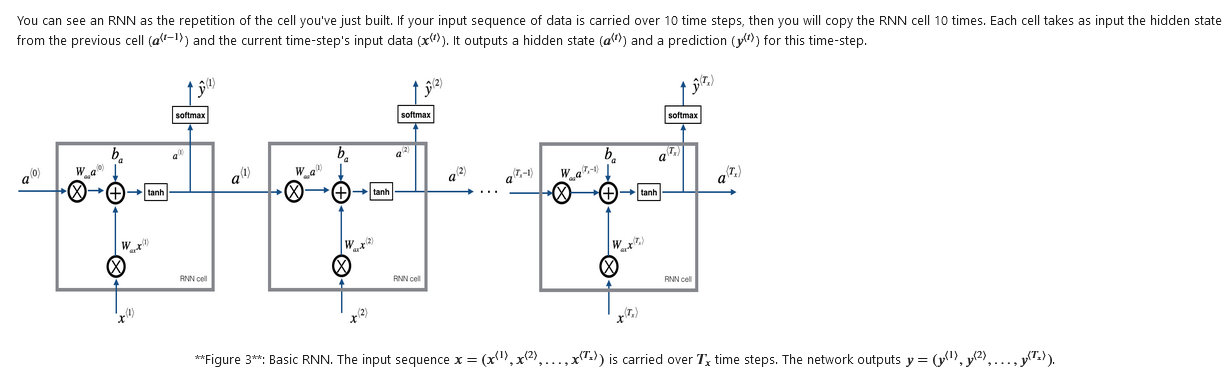

In [7]:
def forward_pass(a_init,xt,parameters):
    '''
    Inputs: a_init  = baslangic hidden state'i
            xt = input lar 
            parameters = parametreler(Waa,Wax,Wya,ba,by)
    Output: 
            a_next = sonraki hidden state
            y_pred = tahmin 
            cache = parametreleri tutan dict.
    '''
    caches = [] # parametreleri tutacak liste.
    
    n_x, m, T_x = xt.shape # n_x : kaç input tane olduğu , m : example sayısı , T_x: kaç defa gerçekleşeceği / zaman serisinin tekrar sayısı / sekans sayısı
    n_y, n_a = parameters['wya'].shape # y: tahmin sayısı , n_a : hidden state sayısı
    
    # initialize operations
    a_next = a_init 
    hidden_states = np.zeros((n_a, m, T_x))
    predictions  = np.zeros((n_y,m,T_x))
    
    # Zaman serisine göre RNN ile tahminleri ve hidden state'leri hesaplayıp oluşturalım.
    for t in range(T_x):
        girdi = xt[:,:,t]
        a_next, y_pred, cache = create_rnn_cell(girdi, a_next, parameters,t)
        hidden_states[:,:,t] = a_next
        predictions[:,:,t] = y_pred
        caches.append(cache)
    
    caches = {'tum_parametreler':caches,'tum_girdiler':xt}
    return hidden_states,predictions,caches


In [8]:
xt = np.random.randn(3,10,4)
print(xt[:,:,:])
print("\n\n",xt[:,:,2].shape)

[[[-1.14434139e+00  8.01861032e-01  4.65672984e-02 -1.86569772e-01]
  [-1.01745873e-01  8.68886157e-01  7.50411640e-01  5.29465324e-01]
  [ 1.37701210e-01  7.78211279e-02  6.18380262e-01  2.32494559e-01]
  [ 6.82551407e-01 -3.10116774e-01 -2.43483776e+00  1.03882460e+00]
  [ 2.18697965e+00  4.41364444e-01 -1.00155233e-01 -1.36444744e-01]
  [-1.19054188e-01  1.74094083e-02 -1.12201873e+00 -5.17094458e-01]
  [-9.97026828e-01  2.48799161e-01 -2.96641152e-01  4.95211324e-01]
  [-1.74703160e-01  9.86335188e-01  2.13533901e-01  2.19069973e+00]
  [-1.89636092e+00 -6.46916688e-01  9.01486892e-01  2.52832571e+00]
  [-2.48634778e-01  4.36689932e-02 -2.26314243e-01  1.33145711e+00]]

 [[-2.87307863e-01  6.80069840e-01 -3.19801599e-01 -1.27255876e+00]
  [ 3.13547720e-01  5.03184813e-01  1.29322588e+00 -1.10447026e-01]
  [-6.17362064e-01  5.62761097e-01  2.40737092e-01  2.80665077e-01]
  [-7.31127037e-02  1.16033857e+00  3.69492716e-01  1.90465871e+00]
  [ 1.11105670e+00  6.59049796e-01 -1.62743834

In [9]:
np.random.seed(1)
x = np.random.randn(3,10,2)
a_init = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"waa": Waa, "wax": Wax, "wya": Wya, "ba": ba, "by": by}

hidden_states, predictions, caches = forward_pass(a_init, x, parameters)

In [10]:
display(caches)

{'tum_parametreler': [{'input_1': array([[ 1.62434536, -0.52817175,  0.86540763,  1.74481176,  0.3190391 ,
            1.46210794, -0.3224172 ,  1.13376944, -0.17242821,  0.04221375],
          [-1.10061918,  0.90159072,  0.90085595, -0.12289023, -0.26788808,
           -0.69166075, -0.6871727 , -0.67124613, -1.11731035,  1.65980218],
          [-0.19183555, -0.74715829,  0.05080775,  0.19091548,  0.12015895,
            0.30017032, -1.1425182 , -0.20889423,  0.83898341,  0.28558733]]),
   'a_prev_0': array([[-0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
           -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39649634],
          [-1.44411381, -0.50446586,  0.16003707,  0.87616892,  0.31563495,
           -2.02220122, -0.30620401,  0.82797464,  0.23009474,  0.76201118],
          [-0.22232814, -0.20075807,  0.18656139,  0.41005165,  0.19829972,
            0.11900865, -0.67066229,  0.37756379,  0.12182127,  1.12948391],
          [ 1.19891788,  0.18515642, 

# Backpropagation - Basic RNN 

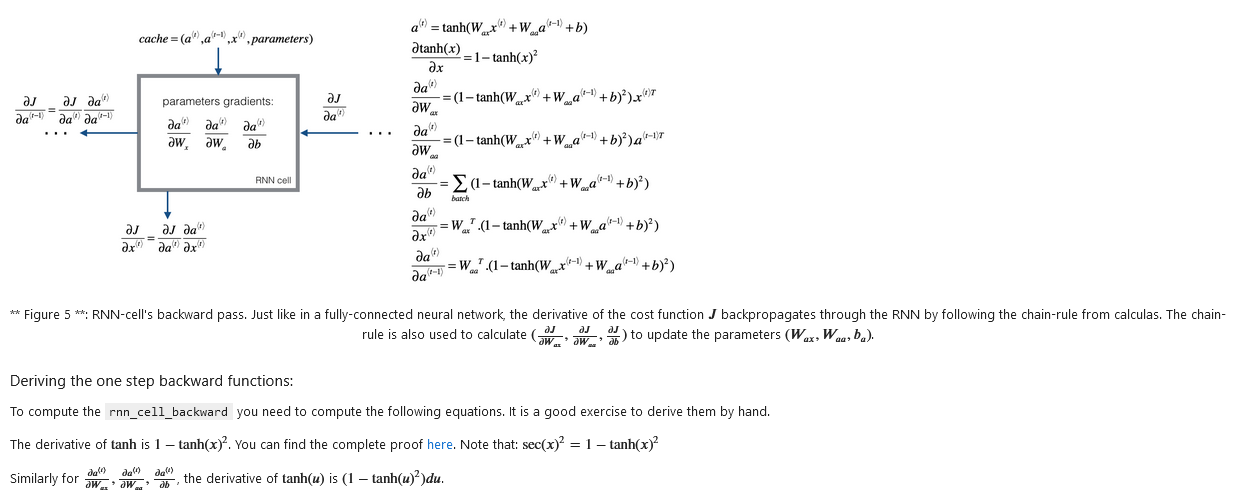

In [11]:
cache_temp

{'input_1': array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
         -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
        [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
         -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
        [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
         -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547]]),
 'a_prev_0': array([[-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
         -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
        [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
         -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311],
        [ 0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
          0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116],
        [-0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       

In [12]:
(xt,a_prev,parameters,a_next),t = cache_temp.values(),list(cache_temp.keys())[0].split('_')[-1]

In [13]:
parameters

{'waa': array([[-0.22232814, -0.20075807,  0.18656139,  0.41005165,  0.19829972],
        [ 0.11900865, -0.67066229,  0.37756379,  0.12182127,  1.12948391],
        [ 1.19891788,  0.18515642, -0.37528495, -0.63873041,  0.42349435],
        [ 0.07734007, -0.34385368,  0.04359686, -0.62000084,  0.69803203],
        [-0.44712856,  1.2245077 ,  0.40349164,  0.59357852, -1.09491185]]),
 'wax': array([[ 0.16938243,  0.74055645, -0.9537006 ],
        [-0.26621851,  0.03261455, -1.37311732],
        [ 0.31515939,  0.84616065, -0.85951594],
        [ 0.35054598, -1.31228341, -0.03869551],
        [-1.61577235,  1.12141771,  0.40890054]]),
 'wya': array([[-0.02461696, -0.77516162,  1.27375593,  1.96710175, -1.85798186],
        [ 1.23616403,  1.62765075,  0.3380117 , -1.19926803,  0.86334532]]),
 'ba': array([[-0.1809203 ],
        [-0.60392063],
        [-1.23005814],
        [ 0.5505375 ],
        [ 0.79280687]]),
 'by': array([[-0.62353073],
        [ 0.52057634]])}

In [14]:
# aktivasyon fonksiyonumuz tanh ise tanh'in türevi-> tan(f(x)) dx ->  için (1 - f(x)^2) dx.
# benim fonksiyonum da tanh(z) .. z = Waa*a<t-1> + Wax * x<t> +ba  -> lineer fonk. -> nonlinear fonk.(hesaplanan lineer fonk.) = sonraki hidden state(a_next)

def rnn_cell_backward(da_next,cache_temp):
    '''
    Inputs: da_next -> sonraki hidden state'in türevi.
            cache_temp -> Girdiler, onceki durum, sonraki durum ve parametre(ağırlık&bias) değerlerini tutan cache dict.
    output: gradients : Mevcut zaman sekansı için ağırlık bias'ler için hesaplanan gradyan listesi .(dict).
    '''
    (xt,a_prev,parameters,a_next) = cache_temp.values()
    Waa = parameters['waa']
    Wax = parameters['wax']
    Wya = parameters['wya']
    ba = parameters['ba']
    by = parameters['by']
    
    # Fonksiyonun türevi
    dtanh = (1 - a_next ** 2) * da_next 
    
    # Wax'e göre kısmı türevleri
    # Zincir kuralına göre hesaplanıyor.
    dxt = np.dot(Wax.T, dtanh) 
    dWax = np.dot(dtanh, xt.T)
    
    # Waa'a göre kısmı türevleri
    da_prev = np.dot(Waa.T, dtanh)
    dWaa = np.dot(dtanh, a_prev.T)

    # Bias değerlerinin gradyanları, hepsini topluyoruz.
    dba = np.sum(dtanh, axis = 1,keepdims=1)


    # Store the gradients in a python dictionary
    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}

    return gradients

In [15]:
da_next = np.random.randn(5,10)
gradients = rnn_cell_backward(da_next,cache_temp)
gradients

{'dxt': array([[ 1.06825189,  1.76855071, -1.85201292, -0.02357179,  0.90255057,
         -0.0741619 ,  1.36530444, -0.33314104, -1.67263164, -0.43451818],
        [-0.60329242, -1.20578335, -0.05889956,  0.19830762, -0.34794587,
          1.62770502, -2.96069178,  1.5330474 ,  1.0123606 ,  2.07718828],
        [-0.28431132, -0.58495884,  1.27329608,  0.48733038, -1.03772243,
         -1.53747349, -0.86669801,  0.00491231,  2.40490193, -1.50470842]]),
 'da_prev': array([[ 5.02494478e-01,  4.72617805e-01, -3.35114248e-01,
          4.12941604e-02,  8.08414310e-02, -2.61829050e-01,
          4.81875813e-01,  7.17431803e-05, -2.19334335e+00,
          2.55282869e-01],
        [-6.30934062e-01, -1.38596284e+00,  1.45824240e+00,
          2.91454574e-01, -7.84932345e-01, -2.50094746e-01,
         -1.59033137e+00,  4.14115169e-01,  1.19099352e+00,
          1.46004032e-01],
        [-3.45732231e-01, -4.02755755e-01,  3.58704640e-01,
         -1.55563789e-01,  1.57773394e-02,  3.10155738e-01,

In [16]:
def rnn_backward(da, caches):
    """
    Implement the backward pass for a RNN over an entire sequence of input data.

    Arguments:
    da -- Upstream gradients of all hidden states, of shape (n_a, m, T_x)
    caches -- tuple containing information from the forward pass (rnn_forward)
    
    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradient w.r.t. the input data, numpy-array of shape (n_x, m, T_x)
                        da0 -- Gradient w.r.t the initial hidden state, numpy-array of shape (n_a, m)
                        dWax -- Gradient w.r.t the input's weight matrix, numpy-array of shape (n_a, n_x)
                        dWaa -- Gradient w.r.t the hidden state's weight matrix, numpy-arrayof shape (n_a, n_a)
                        dba -- Gradient w.r.t the bias, of shape (n_a, 1)
    """
        
    ### START CODE HERE ###
    
    # Retrieve values from the first cache (t=1) of caches (≈2 lines)
    (caches, x) = caches.values()
    (x1, a0, parameters, a1) = caches[0].values()

    
    # Retrieve dimensions from da's and x1's shapes (≈2 lines)
    n_a, m, T_x = da.shape
    n_x, m = x1.shape
    
    # initialize the gradients with the right sizes (≈6 lines)
    dx = np.zeros((n_x, m, T_x))
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1))
    da0 = np.zeros((n_a, m))
    da_prevt = np.zeros((n_a, m))
        
    
    # Loop through all the time steps
    for t in reversed(range(T_x)):
        # Compute gradients at time step t. Choose wisely the "da_next" and the "cache" to use in the backward propagation step. (≈1 line)
        gradients = rnn_cell_backward(da[:,:,t] + da_prevt, caches[t])
        # Retrieve derivatives from gradients (≈ 1 line)
        dxt, da_prevt, dWaxt, dWaat, dbat = gradients["dxt"], gradients["da_prev"], gradients["dWax"], gradients["dWaa"], gradients["dba"]
        # Increment global derivatives w.r.t parameters by adding their derivative at time-step t (≈4 lines)
        dx[:, :, t] = dxt
        dWax += dWaxt
        dWaa += dWaat
        dba += dbat
        
    # Set da0 to the gradient of a which has been backpropagated through all time-steps (≈1 line) 
    da0 = da_prevt
    ### END CODE HERE ###

    # Store the gradients in a python dictionary
    gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa,"dba": dba}
    
    return gradients

In [17]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Wax = np.random.randn(5,3)
Waa = np.random.randn(5,5)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"wax": Wax, "waa": Waa, "wya": Wya, "ba": ba, "by": by}
a, y, caches = forward_pass(a0, x, parameters)
da = np.random.randn(5, 10, 4)
gradients = rnn_backward(da, caches)


In [18]:
print("gradients[\"dx\"][1][2] =", gradients["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients["dx"].shape)
print("gradients[\"da0\"][2][3] =", gradients["da0"][2][3])
print("gradients[\"da0\"].shape =", gradients["da0"].shape)
print("gradients[\"dWax\"][3][1] =", gradients["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients["dba"][4])
print("gradients[\"dba\"].shape =", gradients["dba"].shape)

gradients["dx"][1][2] = [-2.07101689 -0.59255627  0.02466855  0.01483317]
gradients["dx"].shape = (3, 10, 4)
gradients["da0"][2][3] = -0.31494237512664996
gradients["da0"].shape = (5, 10)
gradients["dWax"][3][1] = 11.264104496527777
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 2.303333126579893
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [-0.74747722]
gradients["dba"].shape = (5, 1)
